In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Loading collelcted data
df = pd.read_csv("complete_data.csv")

In [3]:
df.head()

Date      HPI      Date.1  InterestDiscount  Avg Mortgage  \
0  2000-01-01  100.000  2000-01-01              5.00        8.2100   
1  2000-02-01  100.571  2000-02-01              5.24        8.3250   
2  2000-03-01  101.466  2000-03-01              5.34        8.2400   
3  2000-04-01  102.540  2000-04-01              5.50        8.1525   
4  2000-05-01  103.701  2000-05-01              5.71        8.5150   

            gdp  Cons. Sentiment Index       cpi  population  \
0  45983.000000                  112.0  0.297089      211410   
1  46228.615385                  111.3  0.592417      211576   
2  46458.384615                  107.1  0.824499      211772   
3  46704.000000                  109.2  0.058411      212018   
4  46677.626374                  110.7  0.116754      212242   

   employed population  avg house sales price  monthly new houses  \
0               136559           202900.00000                 4.3   
1               136598           202729.67033                 4.3   
2               136701           202570.32967                 4.3   
3               137270           202400.00000                 4.4   
4               136630           202960.43956                 4.4   

   new houses authorized  new houses completed    ppi  
0                 1727.0                1574.0  144.1  
1                 1692.0                1677.0  144.7  
2                 1651.0                1704.0  145.4  
3                 1597.0                1610.0  145.6  
4                 1543.0                1682.0  144.9

In [4]:
df.drop(["Date.1"], axis = 1, inplace = True)

In [5]:
df.head()

Date      HPI  InterestDiscount  Avg Mortgage           gdp  \
0  2000-01-01  100.000              5.00        8.2100  45983.000000   
1  2000-02-01  100.571              5.24        8.3250  46228.615385   
2  2000-03-01  101.466              5.34        8.2400  46458.384615   
3  2000-04-01  102.540              5.50        8.1525  46704.000000   
4  2000-05-01  103.701              5.71        8.5150  46677.626374   

   Cons. Sentiment Index       cpi  population  employed population  \
0                  112.0  0.297089      211410               136559   
1                  111.3  0.592417      211576               136598   
2                  107.1  0.824499      211772               136701   
3                  109.2  0.058411      212018               137270   
4                  110.7  0.116754      212242               136630   

   avg house sales price  monthly new houses  new houses authorized  \
0           202900.00000                 4.3                 1727.0   
1           202729.67033                 4.3                 1692.0   
2           202570.32967                 4.3                 1651.0   
3           202400.00000                 4.4                 1597.0   
4           202960.43956                 4.4                 1543.0   

   new houses completed    ppi  
0                1574.0  144.1  
1                1677.0  144.7  
2                1704.0  145.4  
3                1610.0  145.6  
4                1682.0  144.9

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df["Year"] = df['Date'].dt.year
df["Month"] = df['Date'].dt.month

### We will first make train-test split. So that if we do any transformations, we will learn the transformation parameters basd on train data only and avoide data leakage to the model. Since the data is time-series based, we will use time based splitting i.e. last 20 percent of the data will be used to test**

In [8]:
df.shape

(282, 16)

In [9]:
#80 percent data for training
int(0.8*282)

225

**we will take first 225 rows for training set and remaining rows for testing set**

In [10]:
train_df = df[:225]
test_df = df[225:]

# Univariate Analysis

## HPI

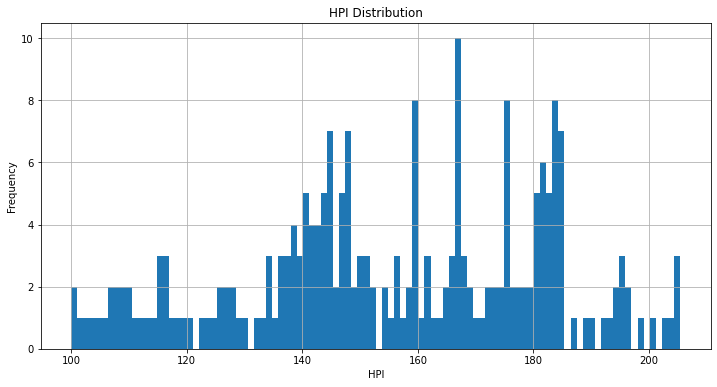

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["HPI"], bins = 100)
plt.title('HPI Distribution')
plt.xlabel('HPI')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

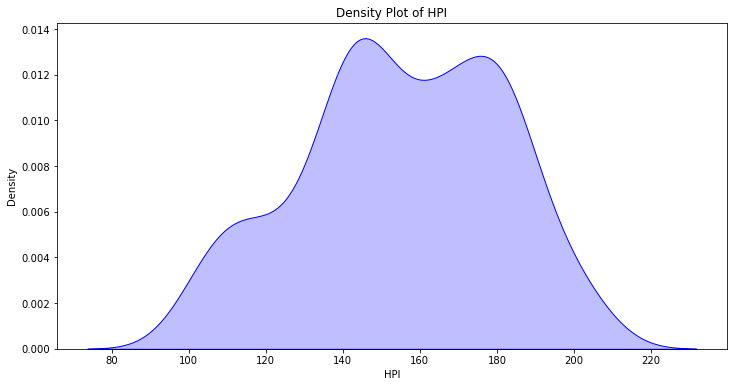

In [12]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["HPI"], shade=True, color='blue')
plt.title('Density Plot of HPI')
plt.xlabel('HPI')
plt.ylabel('Density')

plt.show()

**The distribution seems to be slightly right skewed though skewness is not extreme**

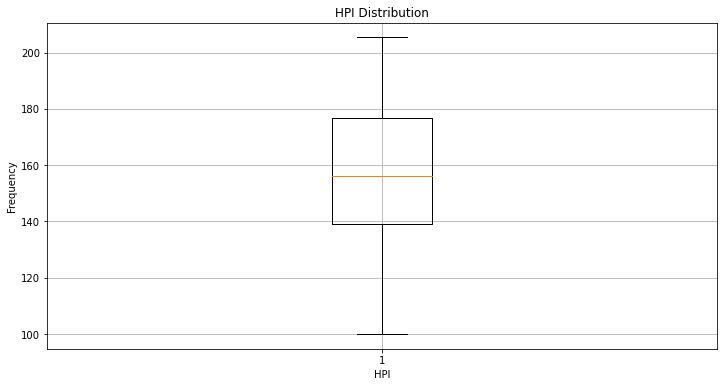

In [13]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["HPI"])
plt.title('HPI Distribution')
plt.xlabel('HPI')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**Apparently no outliers in HPI**

In [14]:
from sklearn.preprocessing import PowerTransformer
boxcox_transformer = PowerTransformer(method='box-cox')
transformed_hpi_train = boxcox_transformer.fit_transform(train_df["HPI"].values.reshape(-1, 1))
transformed_hpi_test = boxcox_transformer.transform(test_df["HPI"].values.reshape(-1, 1))

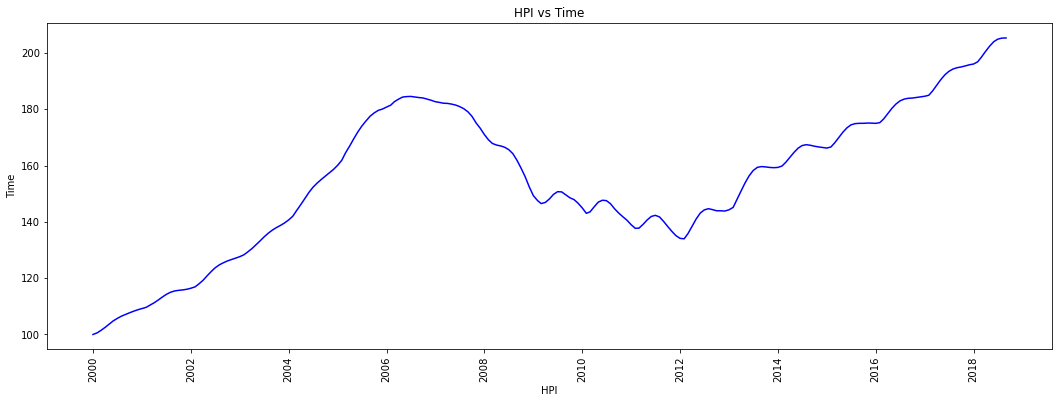

In [15]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["HPI"], label='HPI Line Plot', color='blue', linestyle='-')
plt.title('HPI vs Time')
plt.xlabel('HPI')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**The HPI has in general, increasing nature but we can see a major dip around 2008-2012. This maybe because of 2008 housing market crash**

## 'InterestDiscount'

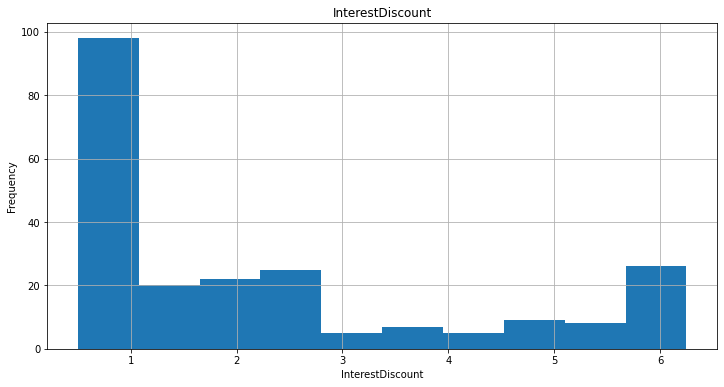

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["InterestDiscount"], bins = 10)
plt.title('InterestDiscount')
plt.xlabel('InterestDiscount')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

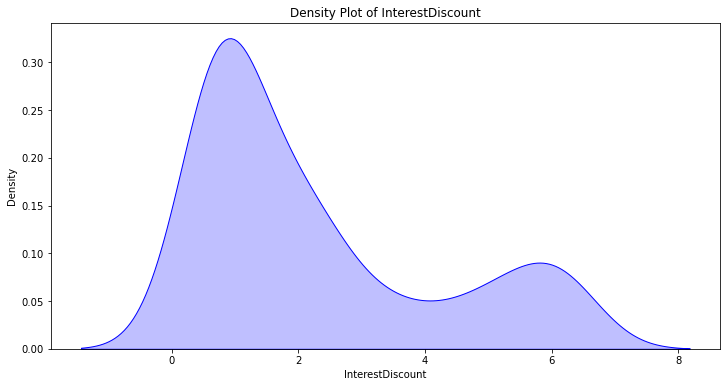

In [17]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["InterestDiscount"], shade=True, color='blue')
plt.title('Density Plot of InterestDiscount')
plt.xlabel('InterestDiscount')
plt.ylabel('Density')

plt.show()

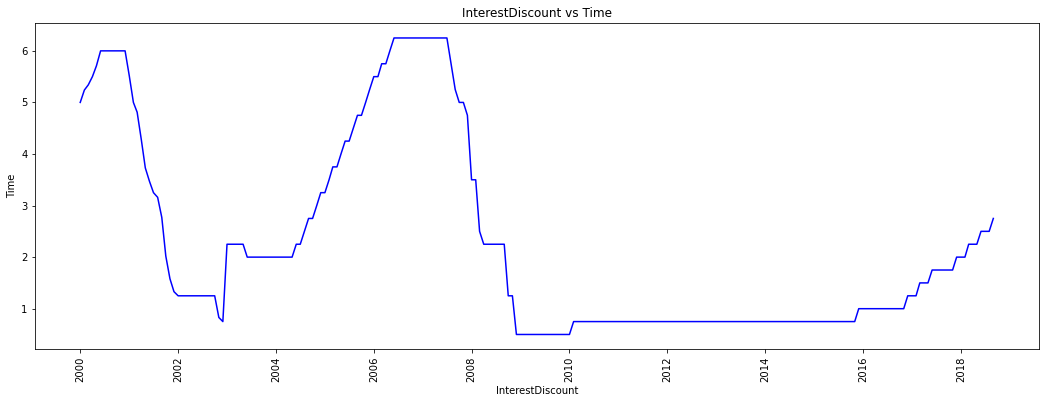

In [18]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["InterestDiscount"], label='InterestDiscount Line Plot', color='blue', linestyle='-')
plt.title('InterestDiscount vs Time')
plt.xlabel('InterestDiscount')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**Interest/Discount rate lies mostly below 2. Rarely it is greater value**

**There is no proper trend in Interest/Discount rate as time progresses. But a significant dip is observed around the time of 2008 housing market crash**

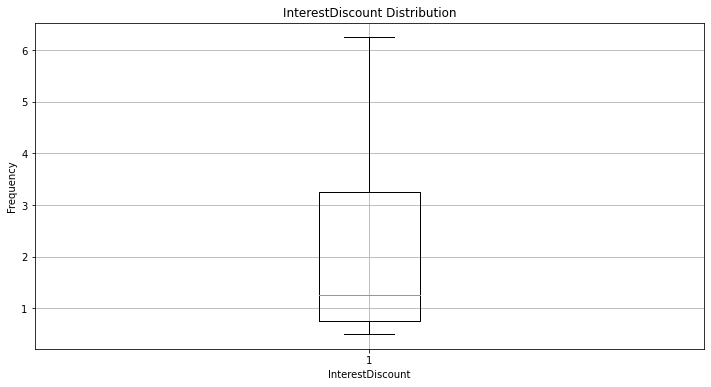

In [19]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["InterestDiscount"])
plt.title('InterestDiscount Distribution')
plt.xlabel('InterestDiscount')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**median value is very low compared to total range of InterestDiscount. Still no apparent outliers**

## Avg Mortgage

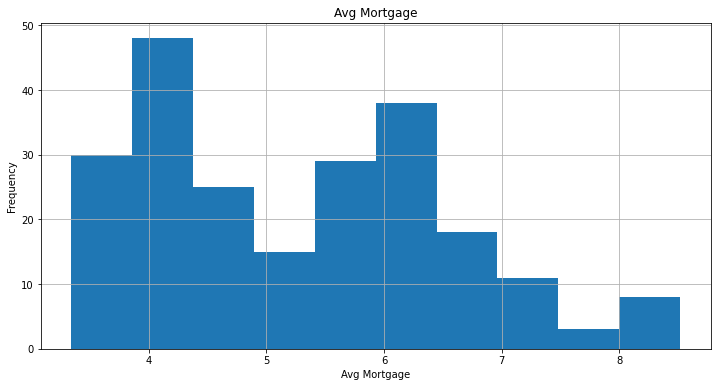

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["Avg Mortgage"], bins = 10)
plt.title('Avg Mortgage')
plt.xlabel('Avg Mortgage')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

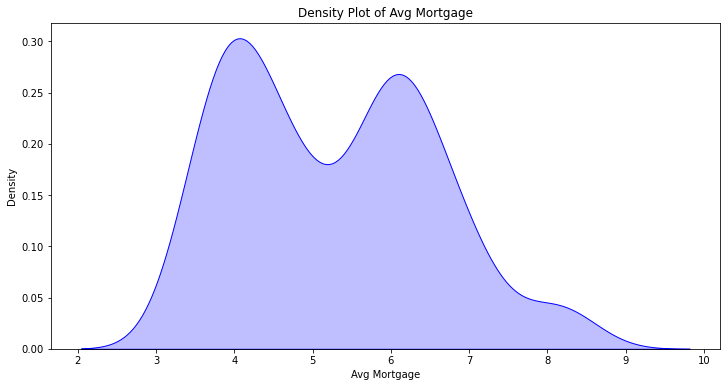

In [21]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["Avg Mortgage"], shade=True, color='blue')
plt.title('Density Plot of Avg Mortgage')
plt.xlabel('Avg Mortgage')
plt.ylabel('Density')

plt.show()

**Avg Mortgage rate shows bimodal distribution and weak right skewness**

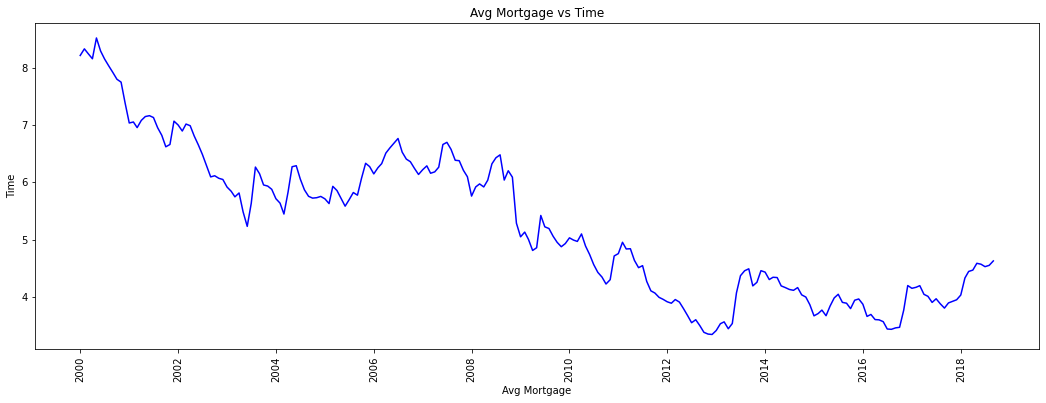

In [22]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["Avg Mortgage"], label='Avg Mortgage Line Plot', color='blue', linestyle='-')
plt.title('Avg Mortgage vs Time')
plt.xlabel('Avg Mortgage')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**Avg Mortgage rate coninuously decreased overtime**

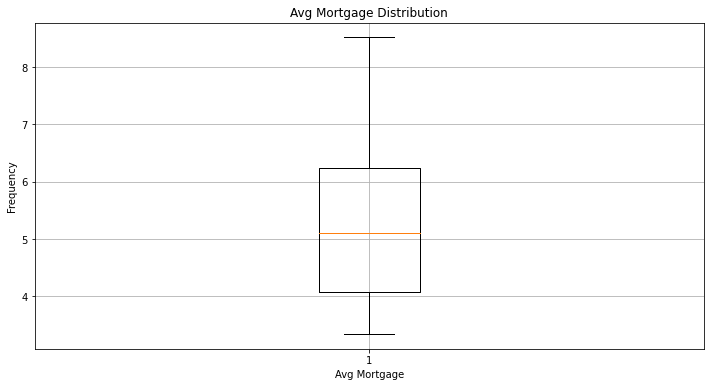

In [23]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["Avg Mortgage"])
plt.title('Avg Mortgage Distribution')
plt.xlabel('Avg Mortgage')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**no apparent outliers** 

## 'gdp'

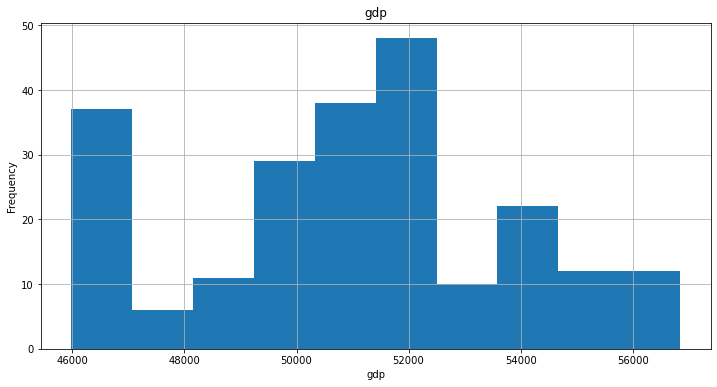

In [24]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["gdp"], bins = 10)
plt.title('gdp')
plt.xlabel('gdp')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

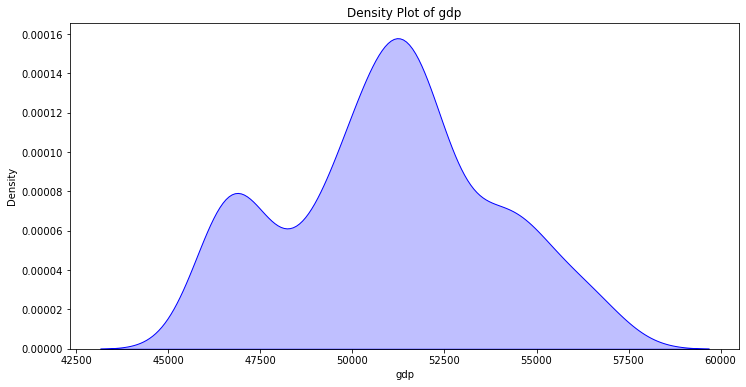

In [25]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["gdp"], shade=True, color='blue')
plt.title('Density Plot of gdp')
plt.xlabel('gdp')
plt.ylabel('Density')

plt.show()

**Bimodal, non skewed distribution**

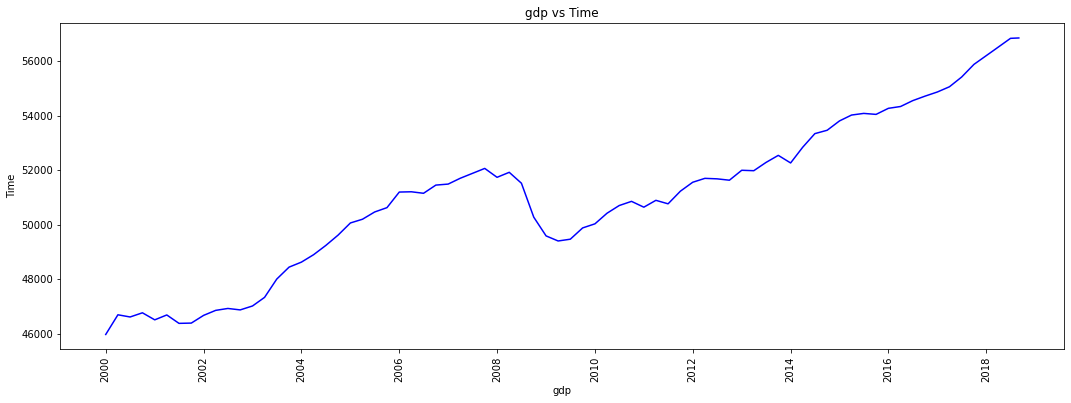

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["gdp"], label='gdp Line Plot', color='blue', linestyle='-')
plt.title('gdp vs Time')
plt.xlabel('gdp')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**gdp per capita showns coninuously increasing trend excpet 2008 market crash**

## Cons. Sentiment Index

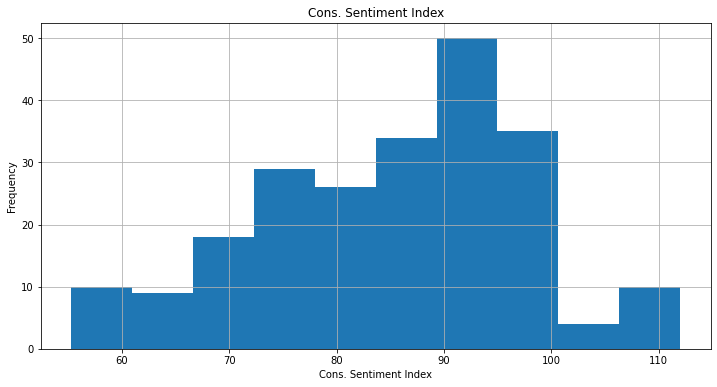

In [27]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["Cons. Sentiment Index"], bins = 10)
plt.title('Cons. Sentiment Index')
plt.xlabel('Cons. Sentiment Index')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

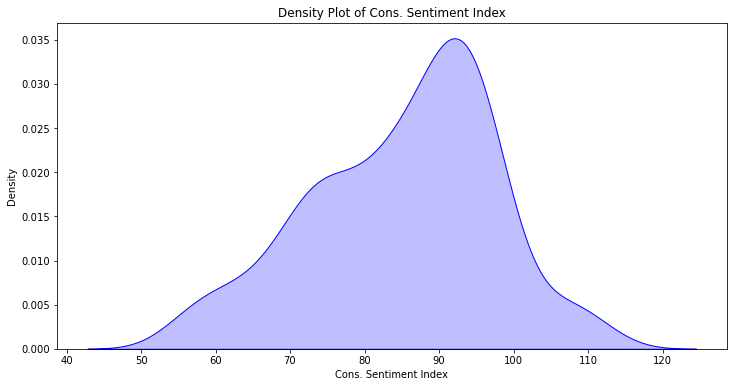

In [28]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["Cons. Sentiment Index"], shade=True, color='blue')
plt.title('Density Plot of Cons. Sentiment Index')
plt.xlabel('Cons. Sentiment Index')
plt.ylabel('Density')

plt.show()

**close to normal but slightly left skewed distribution. value generally lies below 100**

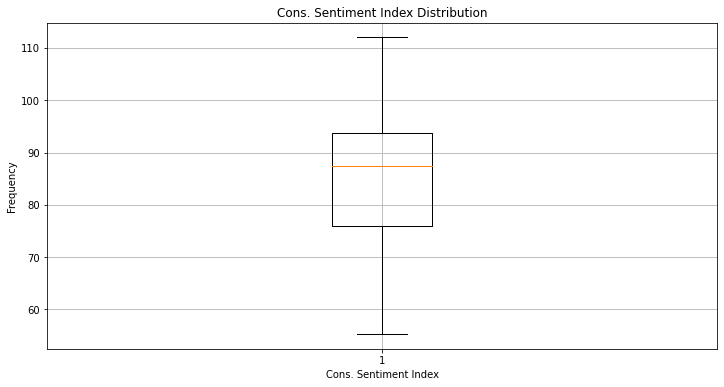

In [29]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["Cons. Sentiment Index"])
plt.title('Cons. Sentiment Index Distribution')
plt.xlabel('Cons. Sentiment Index')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**No outliers**

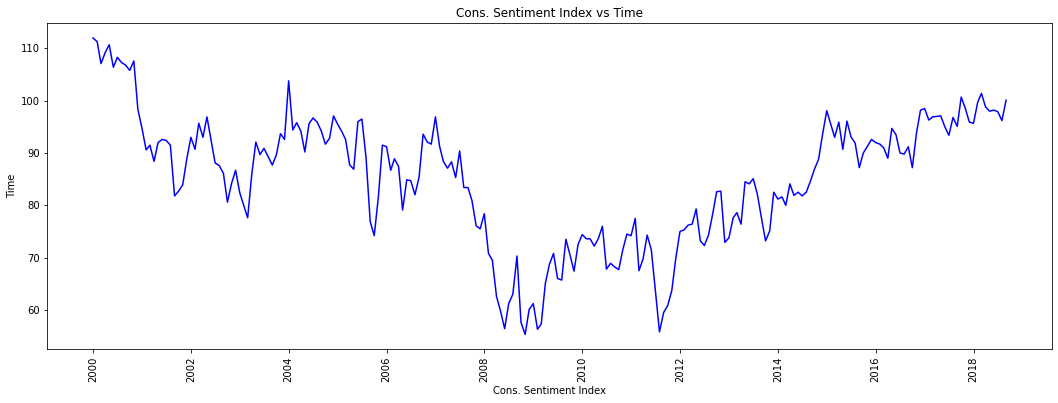

In [30]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["Cons. Sentiment Index"], label='Cons. Sentiment Index Line Plot', color='blue', linestyle='-')
plt.title('Cons. Sentiment Index vs Time')
plt.xlabel('Cons. Sentiment Index')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**No specific trend**

## cpi

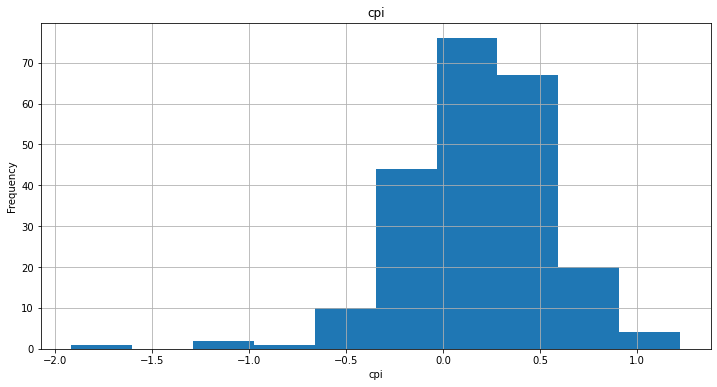

In [31]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["cpi"], bins = 10)
plt.title('cpi')
plt.xlabel('cpi')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

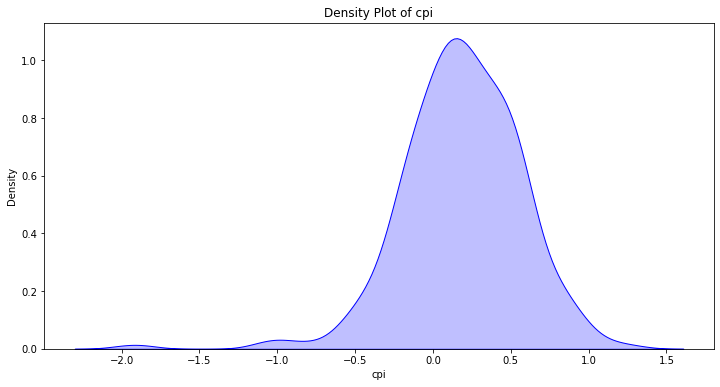

In [32]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["cpi"], shade=True, color='blue')
plt.title('Density Plot of cpi')
plt.xlabel('cpi')
plt.ylabel('Density')

plt.show()

**very left skewed distribution and there are a lot of negative values too which shows defletion instead of inflation**

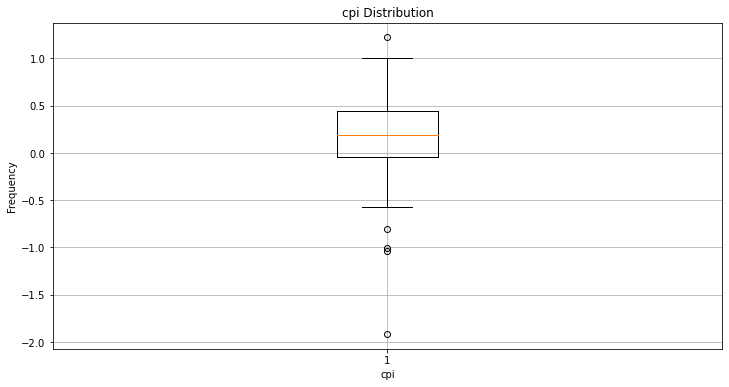

In [33]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["cpi"])
plt.title('cpi Distribution')
plt.xlabel('cpi')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**There are a few outliers in cpi**

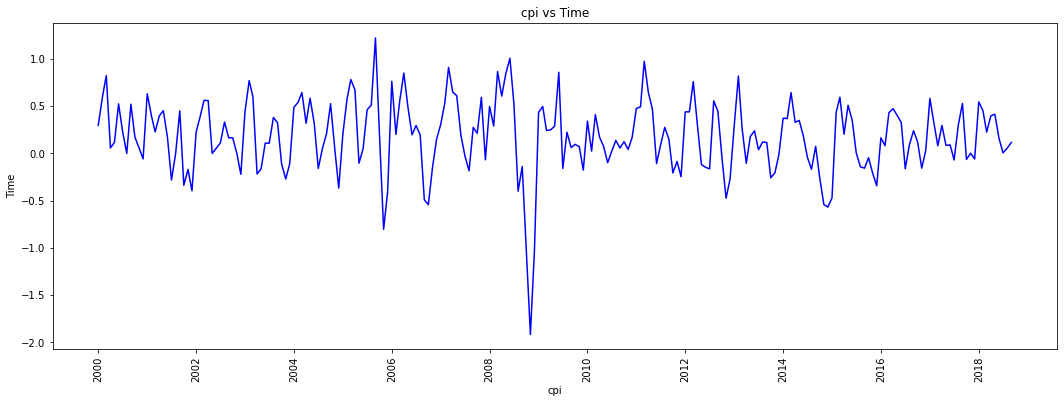

In [34]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["cpi"], label='cpi Line Plot', color='blue', linestyle='-')
plt.title('cpi vs Time')
plt.xlabel('cpi')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**Flat overall trend, some seasonality**

## 'population'

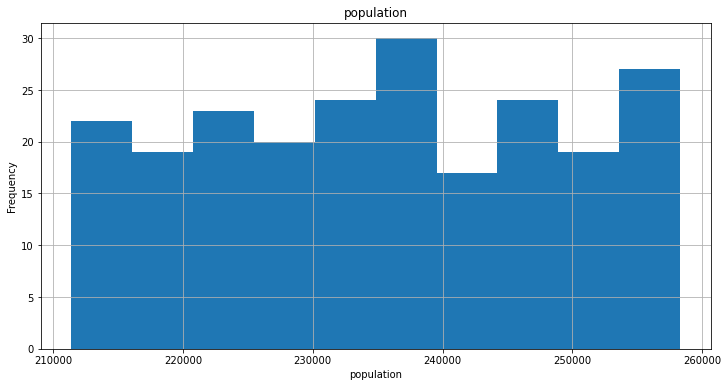

In [35]:
plt.figure(figsize=(12, 6))
plt.hist(train_df["population"], bins = 10)
plt.title('population')
plt.xlabel('population')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

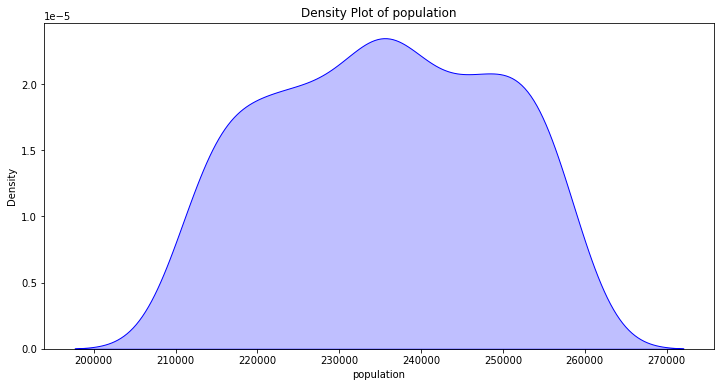

In [36]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["population"], shade=True, color='blue')
plt.title('Density Plot of population')
plt.xlabel('population')
plt.ylabel('Density')

plt.show()

**Uniforma distribution**

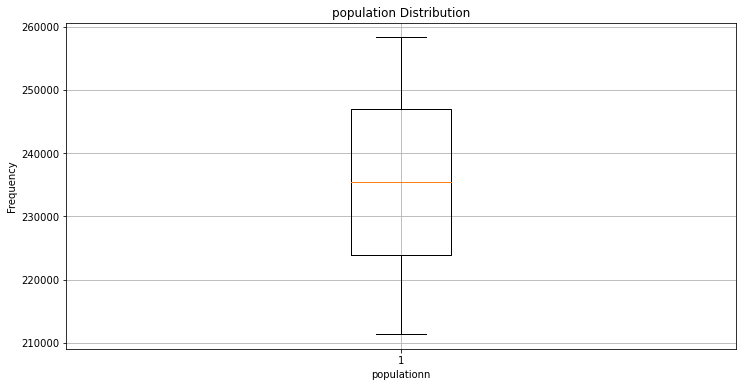

In [37]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["population"])
plt.title('population Distribution')
plt.xlabel('populationn')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

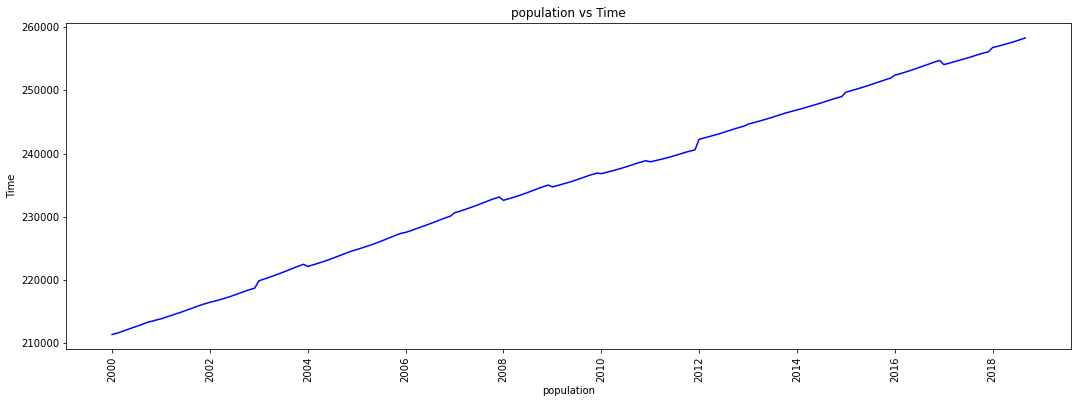

In [38]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["population"], label='population Line Plot', color='blue', linestyle='-')
plt.title('population vs Time')
plt.xlabel('population')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**As expected, population continuously increases**

## Employed population

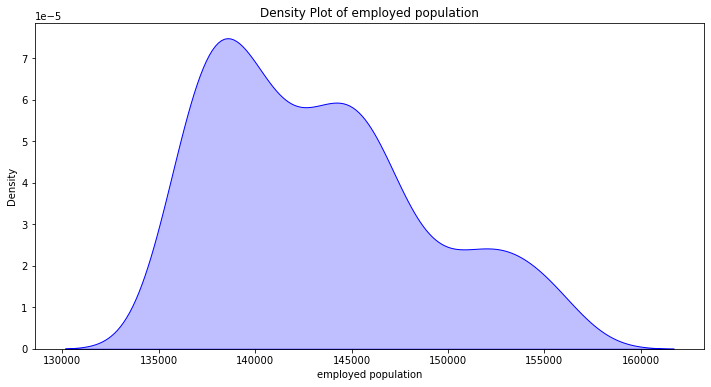

In [39]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["employed population"], shade=True, color='blue')
plt.title('Density Plot of employed population')
plt.xlabel('employed population')
plt.ylabel('Density')

plt.show()

**Interestingly employed population shows a different distribution than population. it is a bit right skewed**

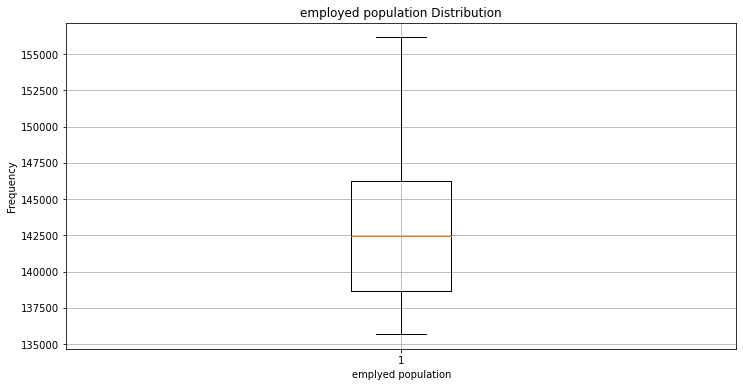

In [40]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["employed population"])
plt.title('employed population Distribution')
plt.xlabel('emplyed population')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**Though median is a little lower, no outliers found**

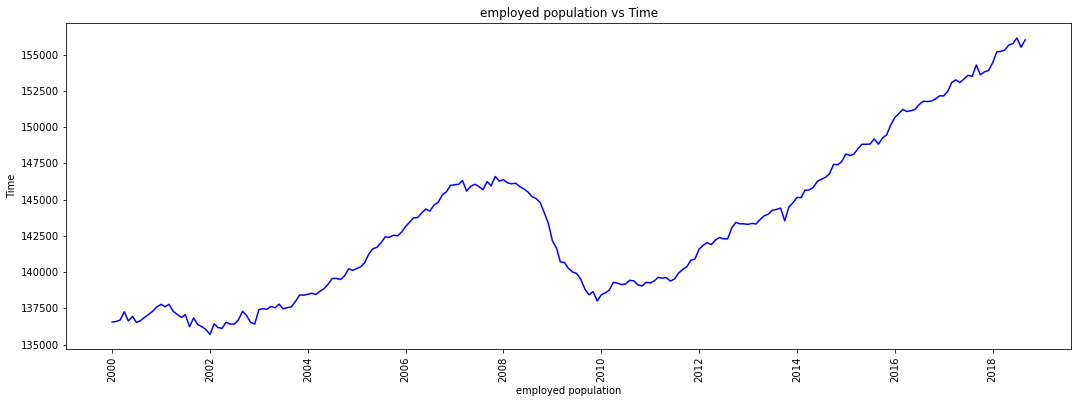

In [41]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["employed population"], label='employed population Line Plot', color='blue', linestyle='-')
plt.title('employed population vs Time')
plt.xlabel('employed population')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**The employed population does not increase coninuously. We see a dip around 2008-2010. It will be interesting to see total population and employed population on the same line plot**

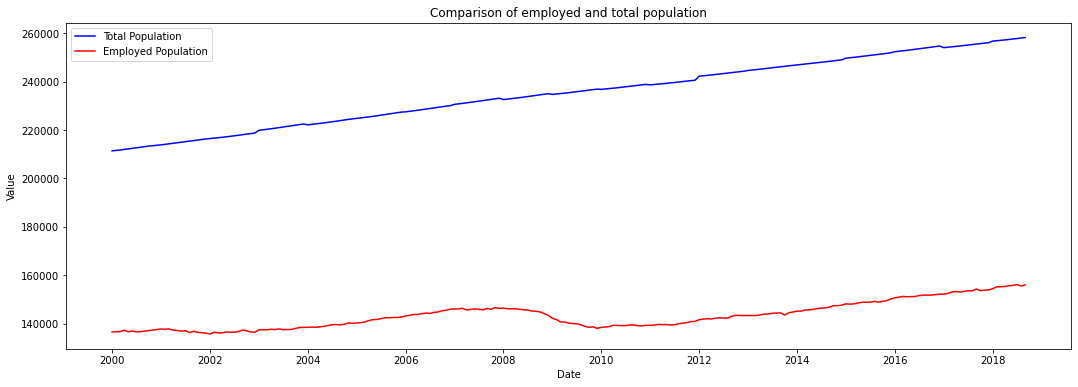

In [42]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["population"], label='Total Population', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["employed population"], label='Employed Population', color='red')

# Add title, labels, and legend
plt.title('Comparison of employed and total population')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**As we can see employed population is way less than total population at all times**

In [43]:
df.columns

Index(['Date', 'HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses authorized',
       'new houses completed', 'ppi', 'Year', 'Month'],
      dtype='object')

## avg house sales price

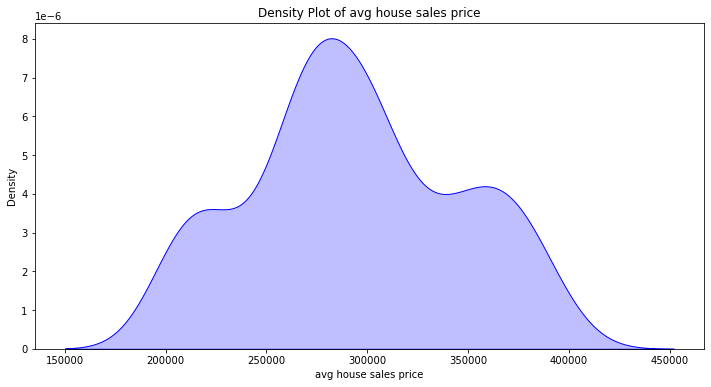

In [44]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["avg house sales price"], shade=True, color='blue')
plt.title('Density Plot of avg house sales price')
plt.xlabel('avg house sales price')
plt.ylabel('Density')

plt.show()

**Close to normal distribution as expected**

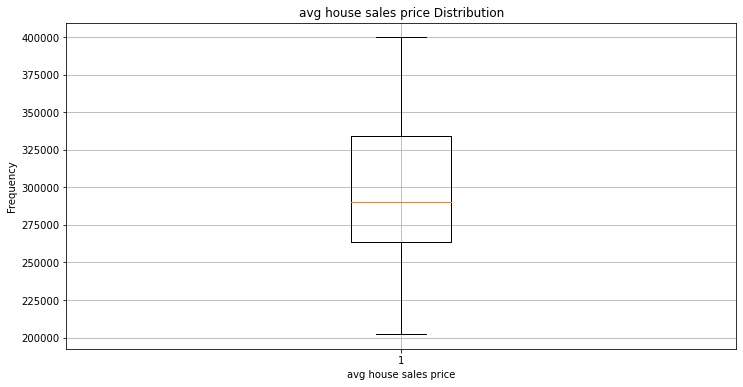

In [45]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["avg house sales price"])
plt.title('avg house sales price Distribution')
plt.xlabel('avg house sales price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**NO outliers**

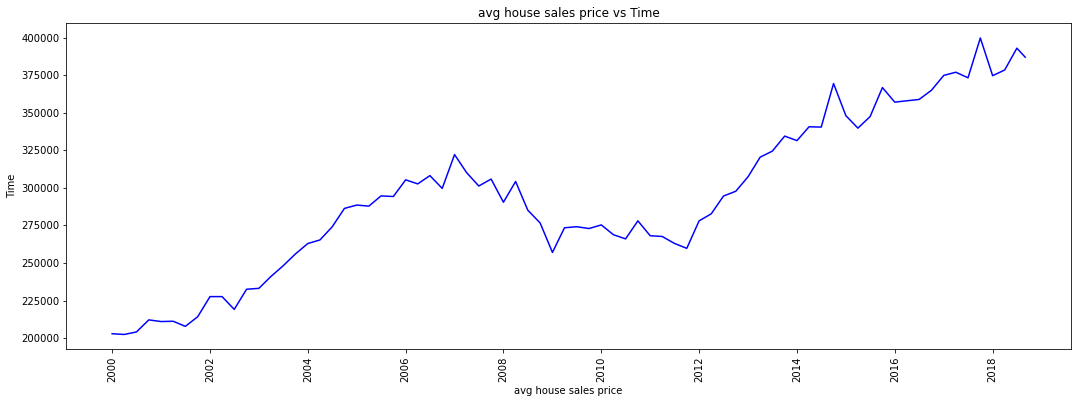

In [46]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["avg house sales price"], label='avg house sales price Line Plot', color='blue', linestyle='-')
plt.title('avg house sales price vs Time')
plt.xlabel('avg house sales price')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**Avg house prices show increasing trend except a dip around 2008-2010**

## monthly new houses

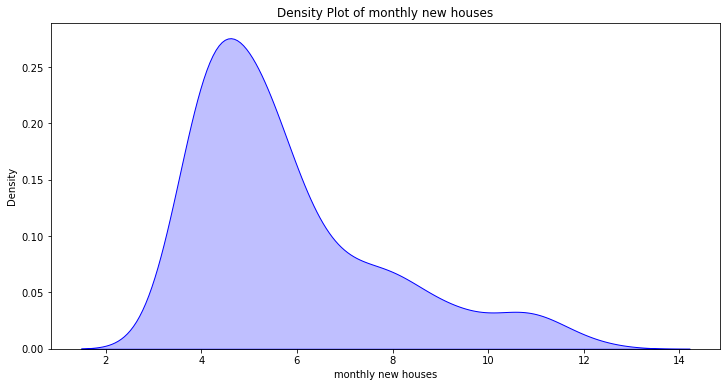

In [47]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["monthly new houses"], shade=True, color='blue')
plt.title('Density Plot of monthly new houses')
plt.xlabel('monthly new houses')
plt.ylabel('Density')

plt.show()

**Right skewed distribution**

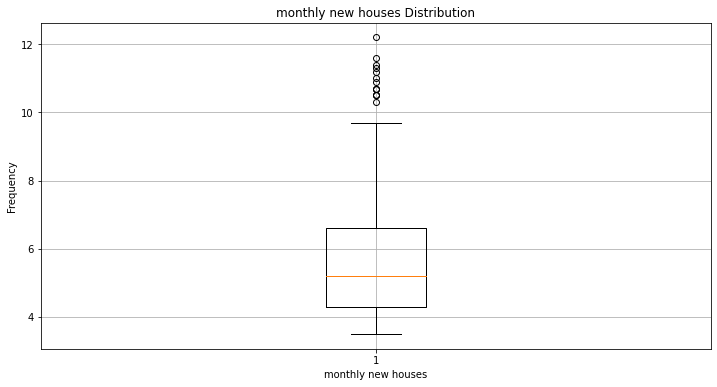

In [48]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["monthly new houses"])
plt.title('monthly new houses Distribution')
plt.xlabel('monthly new houses')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**Median value is low and some outliers are found**

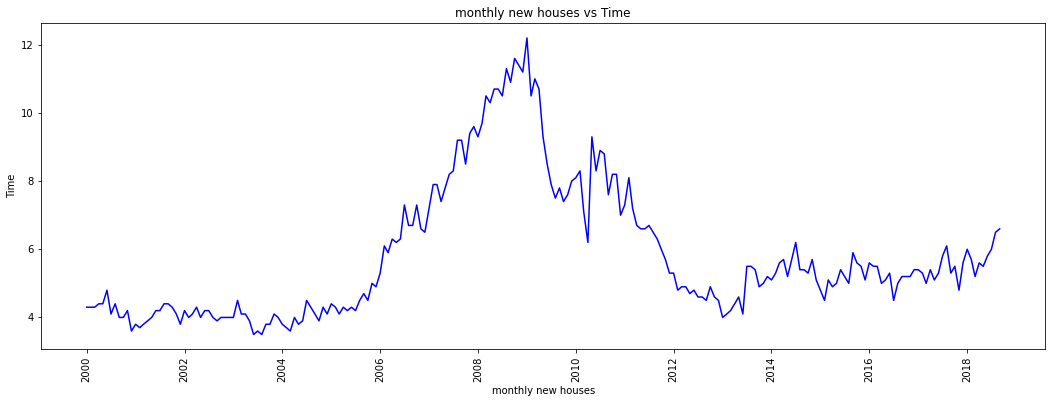

In [49]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["monthly new houses"], label='monthly new houses price Line Plot', color='blue', linestyle='-')
plt.title('monthly new houses vs Time')
plt.xlabel('monthly new houses')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**MOnthly supply of new houses shows mild increasing tredn but it suddely peaks around 2008-20010.**

## new houses authorized

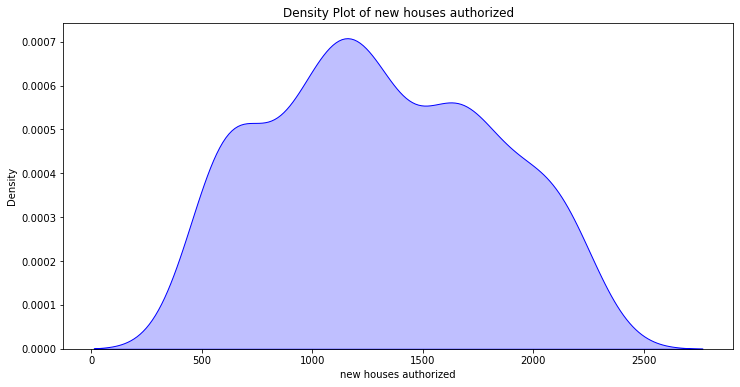

In [50]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["new houses authorized"], shade=True, color='blue')
plt.title('Density Plot of new houses authorized')
plt.xlabel('new houses authorized')
plt.ylabel('Density')

plt.show()

**Uniform distribution**

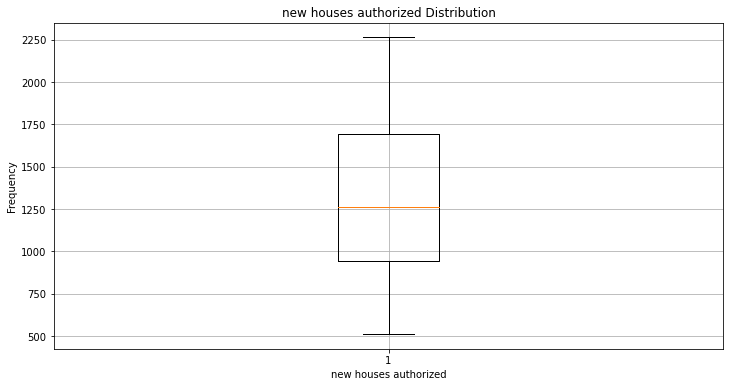

In [51]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["new houses authorized"])
plt.title('new houses authorized Distribution')
plt.xlabel('new houses authorized')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**No outliers**

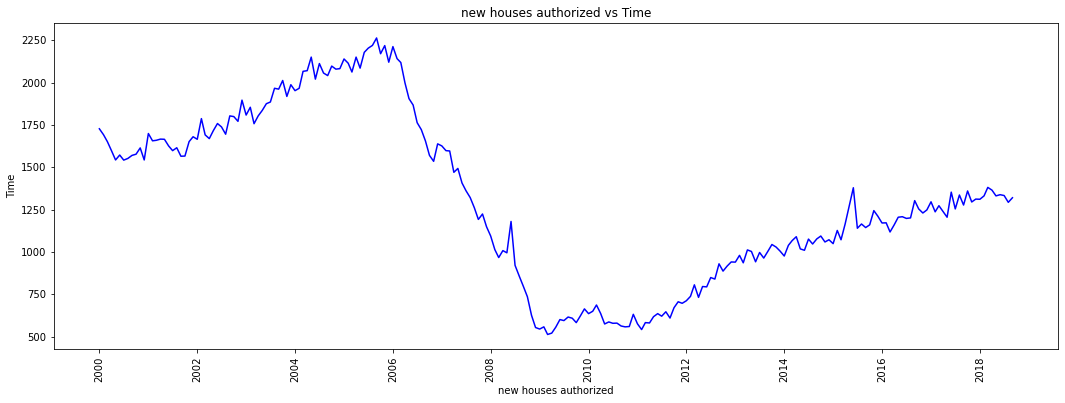

In [52]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["new houses authorized"], label='new houses authorized Line Plot', color='blue', linestyle='-')
plt.title('new houses authorized vs Time')
plt.xlabel('new houses authorized')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**New authorized houses show increasing trend but a sudden dip around 2008-2010**

In [53]:
df.columns

Index(['Date', 'HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses authorized',
       'new houses completed', 'ppi', 'Year', 'Month'],
      dtype='object')

## new houses completed

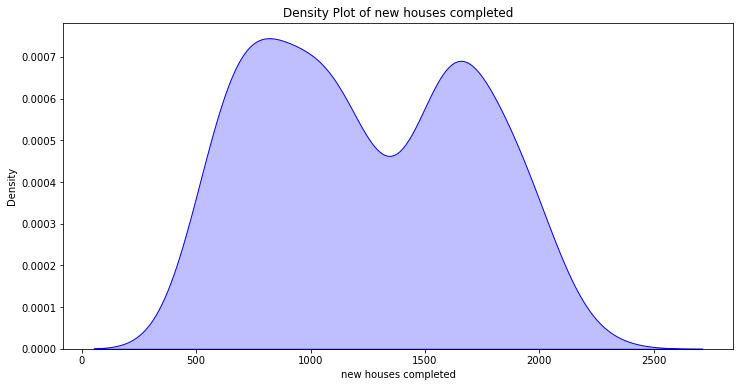

In [54]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["new houses completed"], shade=True, color='blue')
plt.title('Density Plot of new houses completed')
plt.xlabel('new houses completed')
plt.ylabel('Density')

plt.show()

**bimodal-uniform distribution**

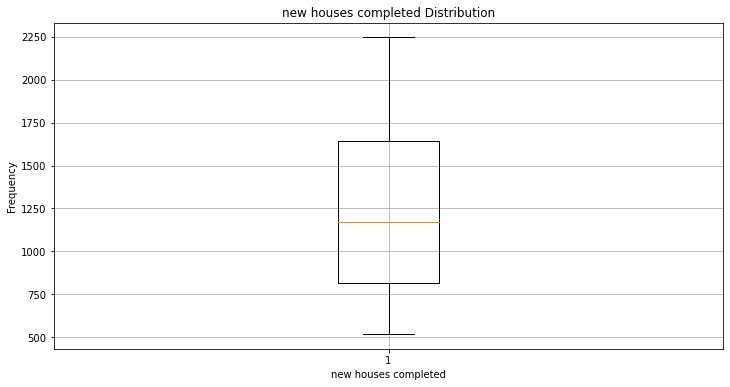

In [55]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["new houses completed"])
plt.title('new houses completed Distribution')
plt.xlabel('new houses completed')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**No outliers**

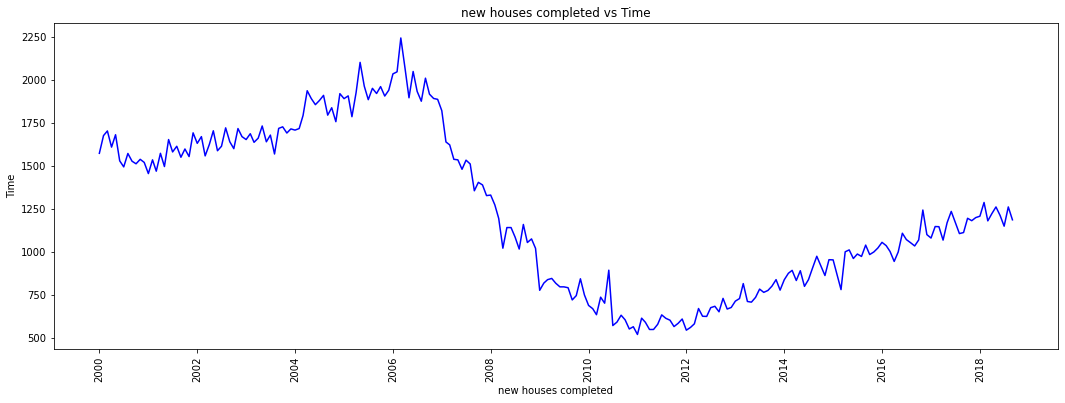

In [56]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["new houses completed"], label='new houses completed Line Plot', color='blue', linestyle='-')
plt.title('new houses completed vs Time')
plt.xlabel('new houses completed')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**New completed houses show increasing trend but a sudden dip around 2008-2010**

**It will be interesting to see how new authorized houses and new completed houses behave together with time**

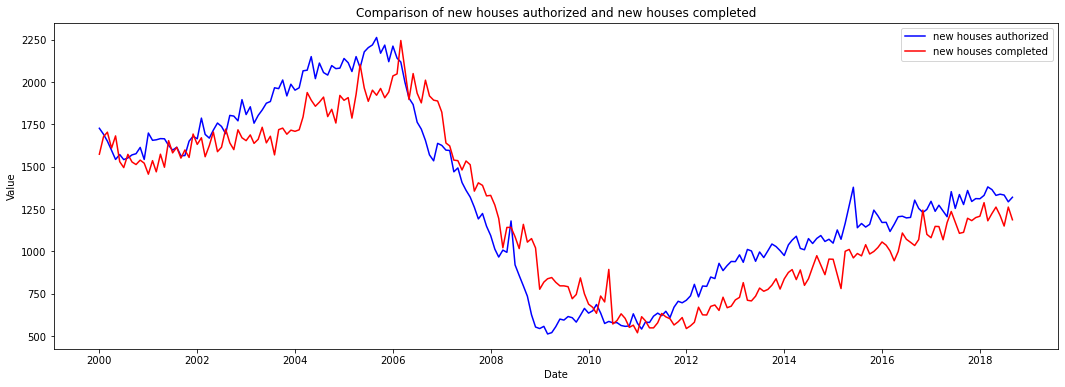

In [57]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["new houses authorized"], label='new houses authorized', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["new houses completed"], label='new houses completed', color='red')

# Add title, labels, and legend
plt.title('Comparison of new houses authorized and new houses completed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**Behaviour of both the variables is in sync with each other. WHich can be expected**

## ppi

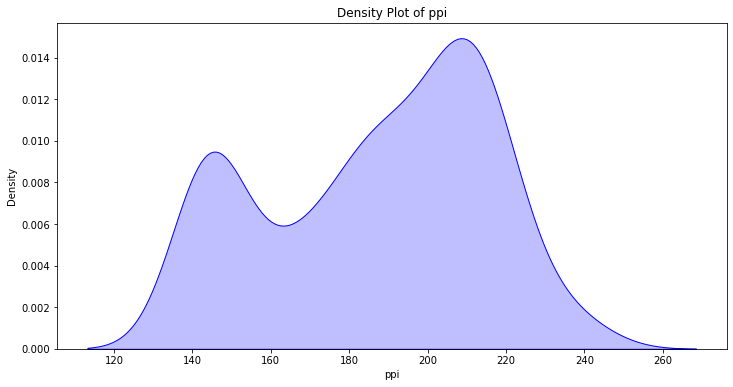

In [58]:
plt.figure(figsize=(12, 6))
sns.kdeplot(train_df["ppi"], shade=True, color='blue')
plt.title('Density Plot of ppi')
plt.xlabel('ppi')
plt.ylabel('Density')

plt.show()

**Bi-Modal close to uniform distribution**

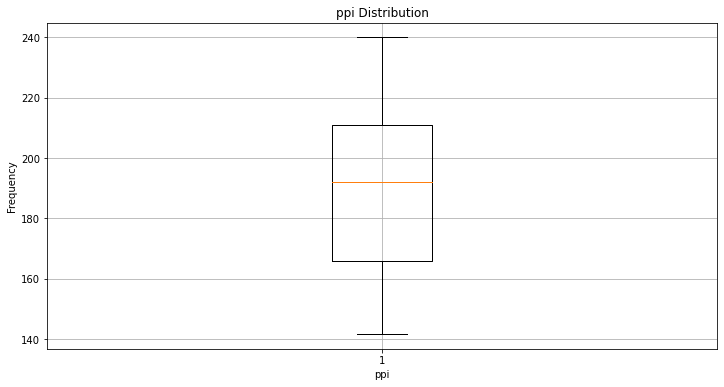

In [59]:
plt.figure(figsize=(12, 6))
plt.boxplot(train_df["ppi"])
plt.title('ppi Distribution')
plt.xlabel('ppi')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

**No outliers**

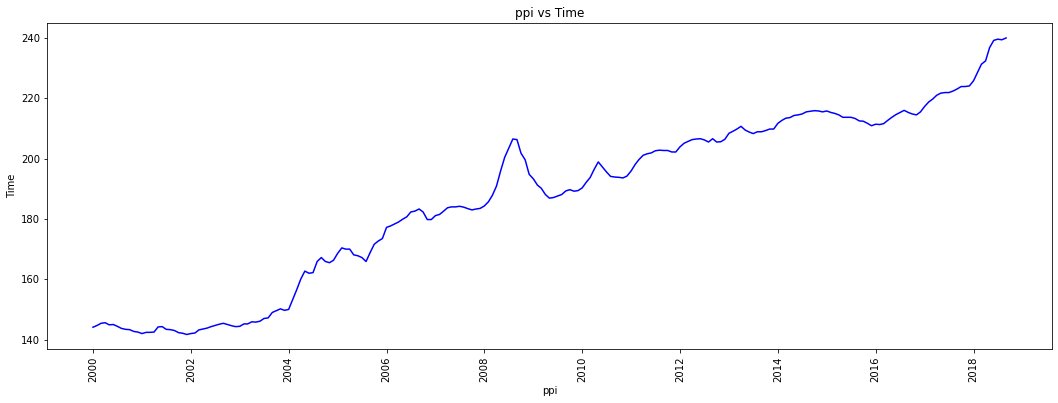

In [60]:
plt.figure(figsize=(18, 6))
plt.plot(train_df["Date"], train_df["ppi"], label='ppi Line Plot', color='blue', linestyle='-')
plt.title('ppi vs Time')
plt.xlabel('ppi')
plt.ylabel('Time')
plt.xticks(rotation=90)
plt.show()

**Continuously increasing trend**

# Bi-Variate Analysis:Relationship between Independent features with dependent features(HPI)

In [61]:
df.columns

Index(['Date', 'HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses authorized',
       'new houses completed', 'ppi', 'Year', 'Month'],
      dtype='object')

## 'InterestDiscount'

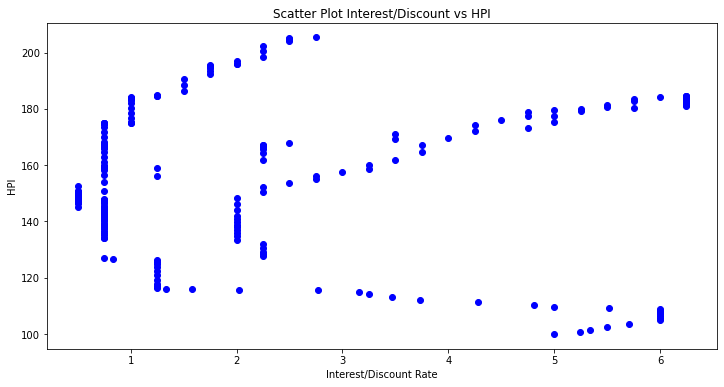

In [62]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["InterestDiscount"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot Interest/Discount vs HPI')
plt.xlabel('Interest/Discount Rate')
plt.ylabel('HPI')

# Show the plot
plt.show()

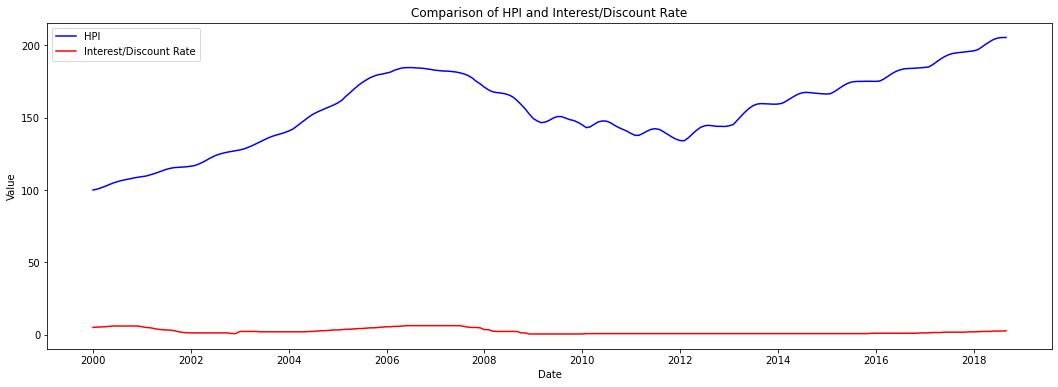

In [63]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["InterestDiscount"], label='Interest/Discount Rate', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and Interest/Discount Rate')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**There is no clear relationship of interest/discount rate with HPI**

## Avg Mortgage Rate

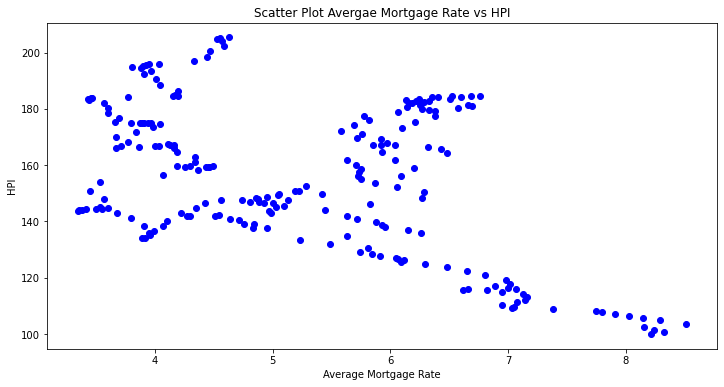

In [64]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["Avg Mortgage"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot Avergae Mortgage Rate vs HPI')
plt.xlabel('Average Mortgage Rate')
plt.ylabel('HPI')

# Show the plot
plt.show()

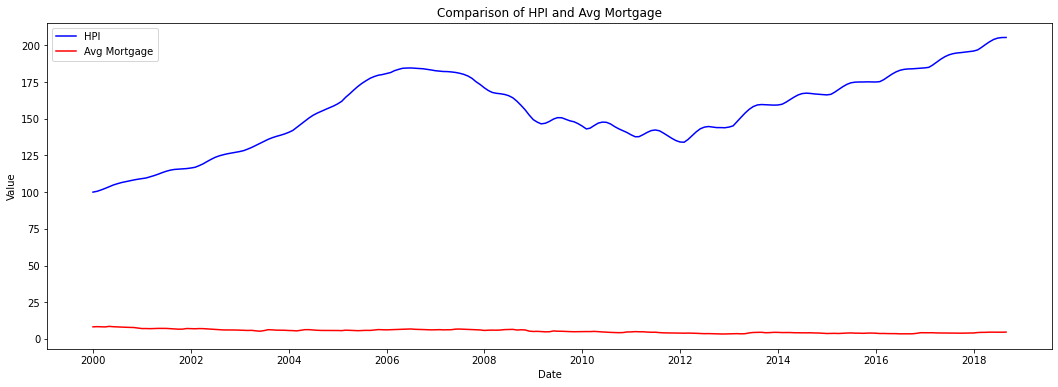

In [65]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["Avg Mortgage"], label='Avg Mortgage', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and Avg Mortgage')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**In general we can see that as mortgage rate increases HPI tends to decrease. The Time series line plot is not much helpful dues to varying scale of two variables**

## gdp

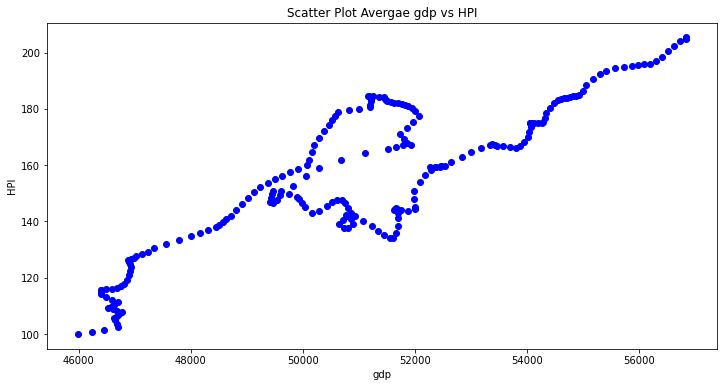

In [66]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["gdp"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot Avergae gdp vs HPI')
plt.xlabel('gdp')
plt.ylabel('HPI')

# Show the plot
plt.show()

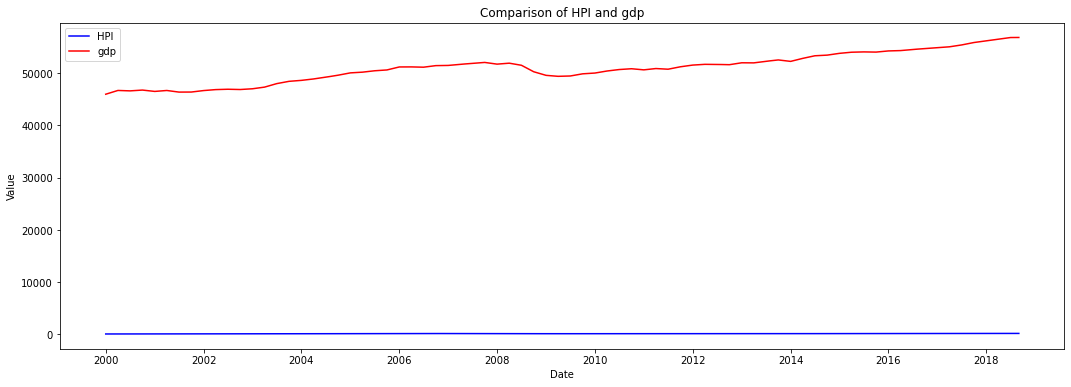

In [67]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["gdp"], label='gdp', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and gdp')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**In general we can see that as gdp increases HPI tends to incease. The Time series line plot is not much helpful dues to varying scale of two variables**

## Cons. Sentiment Index

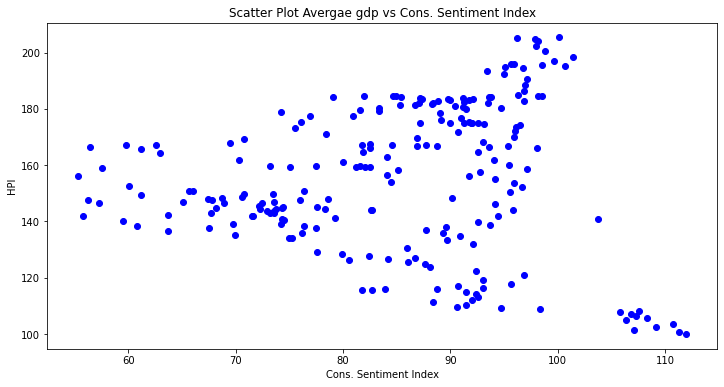

In [68]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["Cons. Sentiment Index"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot Avergae gdp vs Cons. Sentiment Index')
plt.xlabel('Cons. Sentiment Index')
plt.ylabel('HPI')

# Show the plot
plt.show()

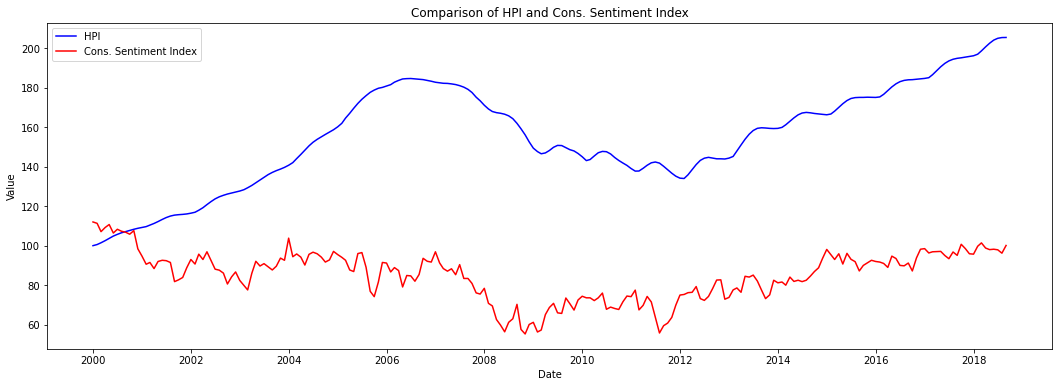

In [69]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["Cons. Sentiment Index"], label='Cons. Sentiment Index', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and Cons. Sentiment Index')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**There is no clear trend between the two but, in general there is pisitive linear relationship between cons.sentiment and hpi**

In [70]:
df.columns

Index(['Date', 'HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses authorized',
       'new houses completed', 'ppi', 'Year', 'Month'],
      dtype='object')

## cpi

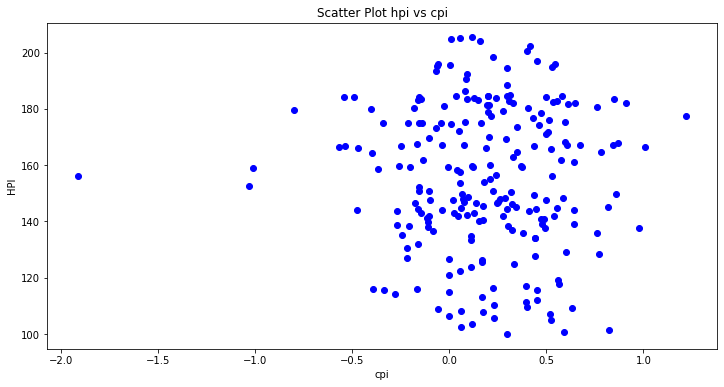

In [71]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["cpi"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs cpi')
plt.xlabel('cpi')
plt.ylabel('HPI')

# Show the plot
plt.show()

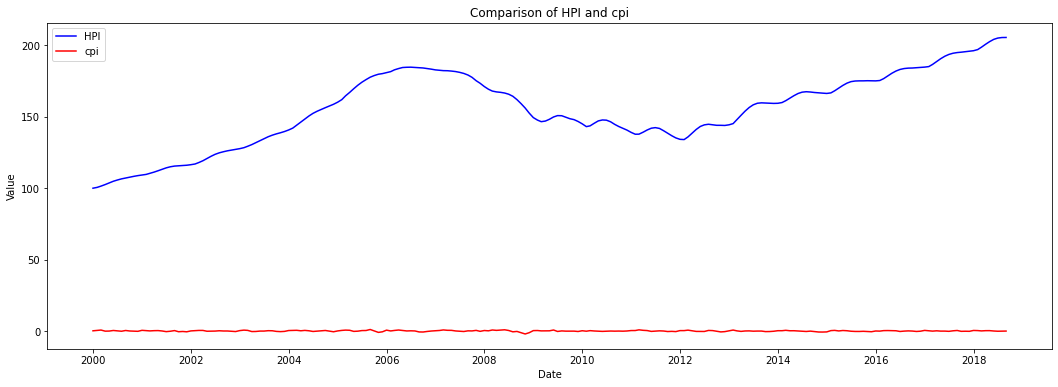

In [72]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["cpi"], label='cpi', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and cpi')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

**No explicit linear relationship**

## population

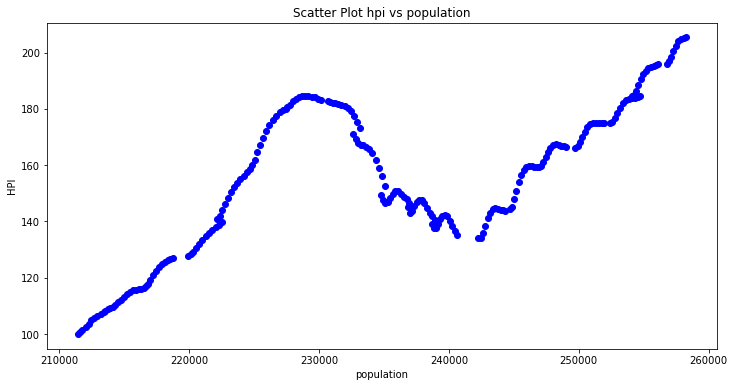

In [73]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["population"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs population')
plt.xlabel('population')
plt.ylabel('HPI')

# Show the plot
plt.show()

**We can see an interesting relationship between population and hpi. It is linear in multiple sections**

## employed population

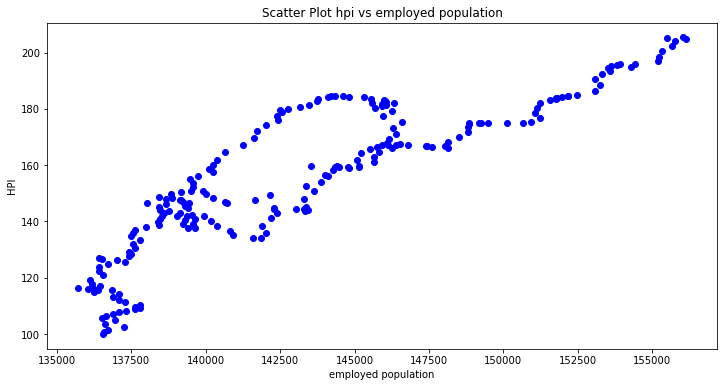

In [74]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["employed population"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs employed population')
plt.xlabel('employed population')
plt.ylabel('HPI')

# Show the plot
plt.show()

**Could be inferenced as linearly increasing relationship**

## avg house sales price

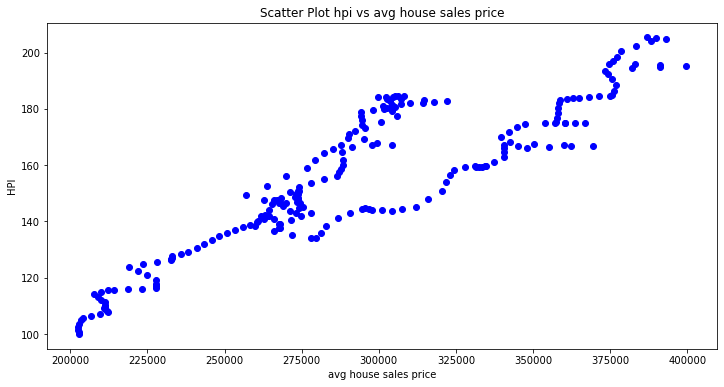

In [75]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["avg house sales price"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs avg house sales price')
plt.xlabel('avg house sales price')
plt.ylabel('HPI')

# Show the plot
plt.show()

**As Sales price increases, HPI increases**

## monthly new houses

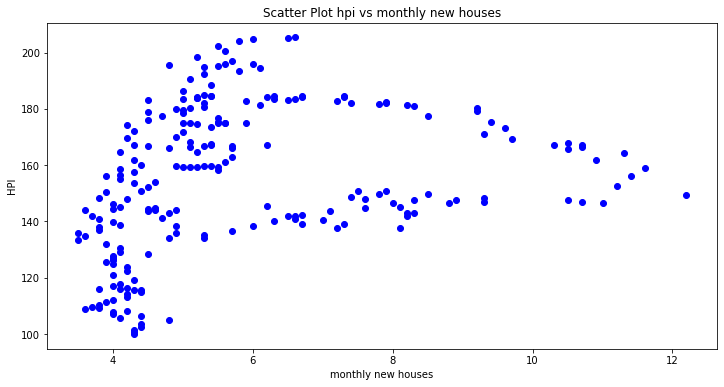

In [76]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["monthly new houses"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs monthly new houses')
plt.xlabel('monthly new houses')
plt.ylabel('HPI')

# Show the plot
plt.show()

**Upto certain value of new monthly houses, hpi increases but after that it saturates**

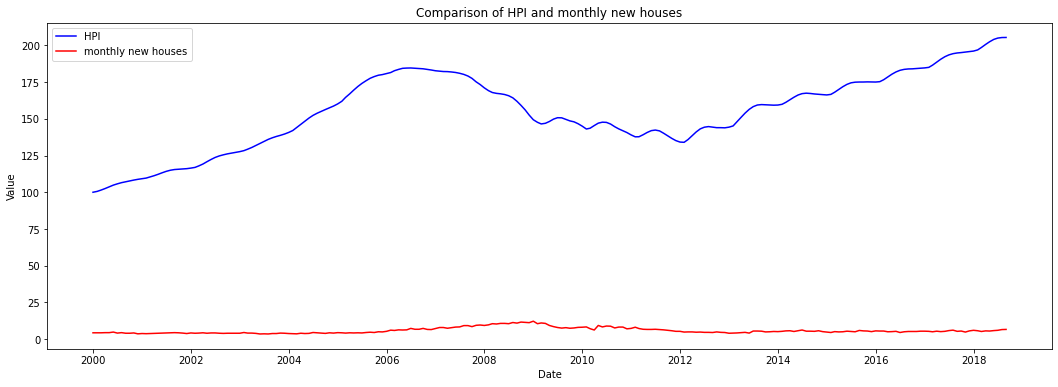

In [77]:
plt.figure(figsize=(18, 6))

# Create a line plot for y1
plt.plot(train_df["Date"], train_df["HPI"], label='HPI', color='blue')

# Create another line plot for y2 on the same plot
plt.plot(train_df["Date"], train_df["monthly new houses"], label='monthly new houses', color='red')

# Add title, labels, and legend
plt.title('Comparison of HPI and monthly new houses')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [78]:
df.columns

Index(['Date', 'HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses authorized',
       'new houses completed', 'ppi', 'Year', 'Month'],
      dtype='object')

## new houses authorized

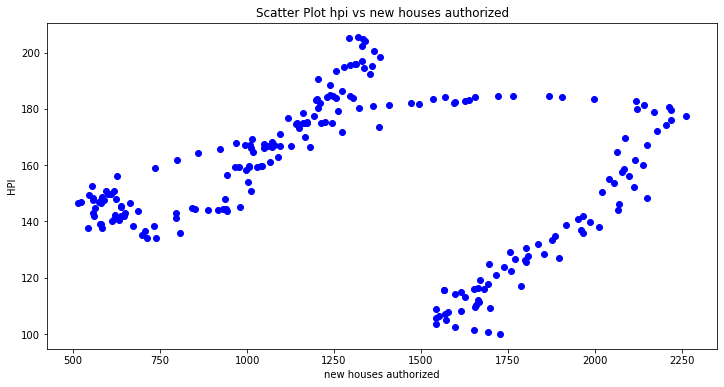

In [79]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["new houses authorized"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs new houses authorized')
plt.xlabel('new houses authorized')
plt.ylabel('HPI')

# Show the plot
plt.show()

**NO clear linearly relaionship**

## new houses completed

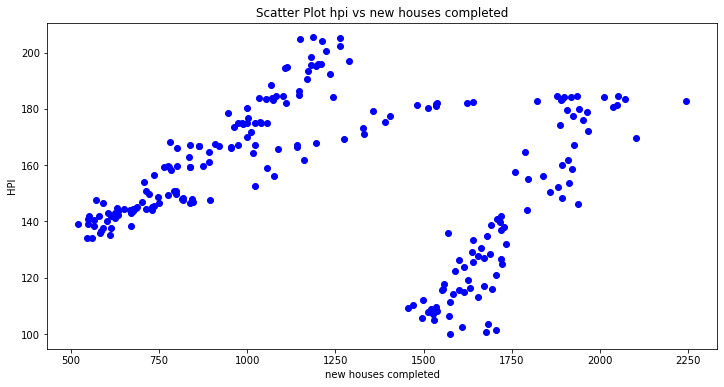

In [80]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["new houses completed"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs new houses completed')
plt.xlabel('new houses completed')
plt.ylabel('HPI')

# Show the plot
plt.show()

**NO clear linearly relaionship. In addition to this , new houses authorized and new houses completed show multicollinearity. We will confirm it below****

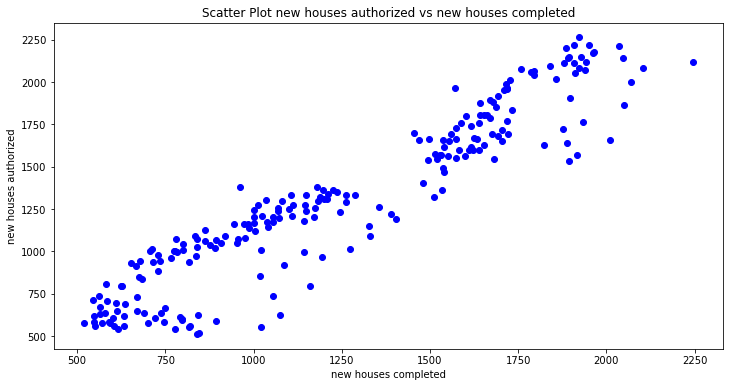

In [81]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["new houses completed"], train_df["new houses authorized"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot new houses authorized vs new houses completed')
plt.xlabel('new houses completed')
plt.ylabel('new houses authorized')

# Show the plot
plt.show()

**We can seea strong linear relationship beween new houses aithorized and new houses completed. We can remove one of these variables to reduxe multicollinearity**

In [82]:
df.drop(["new houses authorized"], axis=  1, inplace = True)
train_df.drop(["new houses authorized"], axis=  1, inplace = True)
test_df.drop(["new houses authorized"], axis=  1, inplace = True)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## ppi

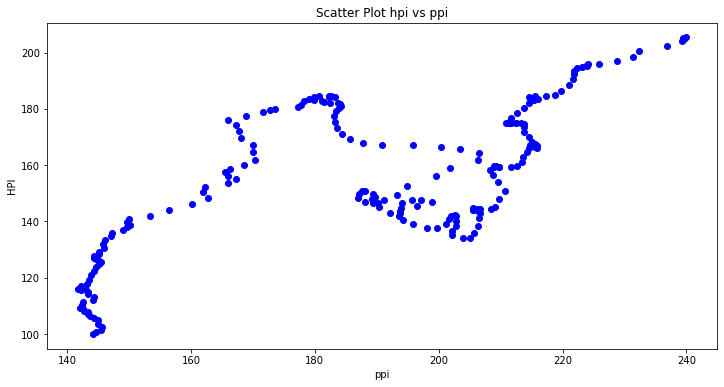

In [83]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["ppi"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs ppi')
plt.xlabel('ppi')
plt.ylabel('HPI')

# Show the plot
plt.show()

**Slight positive relationship but not linear**

# Engineer new feature

## Age
- difference between current date and record date

In [84]:
from datetime import datetime
# Get the current date and time
current_datetime = datetime.now()
# Convert it to a Pandas datetime object
current_date = pd.to_datetime(current_datetime).date()

In [85]:
train_df["Age"] = current_date - train_df["Date"].dt.date

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
test_df["Age"] = current_date - test_df["Date"].dt.date

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
def extract_days(timedelta):
    return timedelta.days

In [88]:
train_df['Age'] = train_df['Age'].apply(extract_days)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
test_df['Age'] = test_df['Age'].apply(extract_days)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


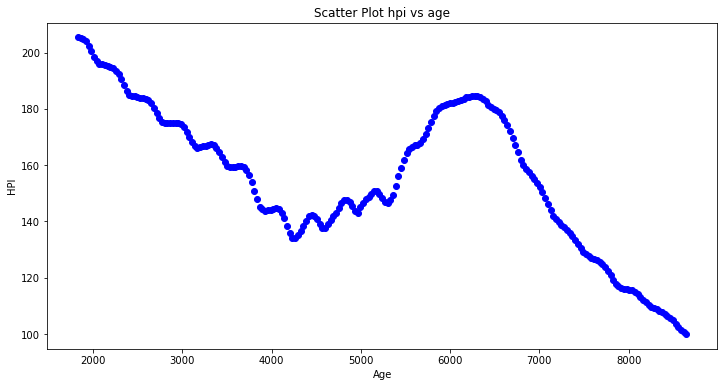

In [90]:
plt.figure(figsize=(12, 6))
# Create a scatter plot
plt.scatter(train_df["Age"], train_df["HPI"], color='blue', marker='o')

# Customize the plot
plt.title('Scatter Plot hpi vs age')
plt.xlabel('Age')
plt.ylabel('HPI')

# Show the plot
plt.show()

**We see negative relationship between Age and HPI. We have extracted date information in Age variable. Now we can drop all other data columns like Date, Month, Year**

In [91]:
train_df.drop(['Date', "Year", "Month"], axis = 1, inplace = True)
test_df.drop(['Date', "Year", "Month"], axis = 1, inplace = True)

### Before modelling, following things are required:
- Clipping outliers in "Monthly new houses" and "cpi"(In training set only)
- scaling the features(learn scaling parameters on train data and apply it to train and test data)

# Clipping outliers

## monthly new houses

In [92]:
monthly_new_houses_mean = np.mean(train_df["monthly new houses"])
monthly_new_houses_std = np.std(train_df["monthly new houses"])

monthly_new_houses_lower_threshold = monthly_new_houses_mean - 3 * monthly_new_houses_std
monthly_new_houses_upper_threshold = monthly_new_houses_mean + 3 * monthly_new_houses_std

train_df['monthly new houses'] = train_df['monthly new houses'].clip(lower=monthly_new_houses_lower_threshold, 
                                                             upper=monthly_new_houses_upper_threshold)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
cpi_mean = np.mean(train_df["cpi"])
cpi_std = np.std(train_df["cpi"])

cpi_lower_threshold = cpi_mean - 3 * cpi_std
cpi_upper_threshold = cpi_mean + 3 * cpi_std

train_df['cpi'] = train_df['cpi'].clip(lower=cpi_lower_threshold, 
                                                             upper=cpi_upper_threshold)

C:\Users\anike\.conda\envs\tf_test\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Standardize independent variables

In [94]:
train_df.columns

Index(['HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses completed',
       'ppi', 'Age'],
      dtype='object')

In [95]:
test_df.columns

Index(['HPI', 'InterestDiscount', 'Avg Mortgage', 'gdp',
       'Cons. Sentiment Index', 'cpi', 'population', 'employed population',
       'avg house sales price', 'monthly new houses', 'new houses completed',
       'ppi', 'Age'],
      dtype='object')

In [96]:
train_df.drop(["HPI"], axis = 1)

InterestDiscount  Avg Mortgage           gdp  Cons. Sentiment Index  \
0                5.00        8.2100  45983.000000                  112.0   
1                5.24        8.3250  46228.615385                  111.3   
2                5.34        8.2400  46458.384615                  107.1   
3                5.50        8.1525  46704.000000                  109.2   
4                5.71        8.5150  46677.626374                  110.7   
..                ...           ...           ...                    ...   
220              2.25        4.5860  56617.164835                   98.0   
221              2.50        4.5700  56725.835165                   98.2   
222              2.50        4.5275  56831.000000                   97.9   
223              2.50        4.5500  56837.739130                   96.2   
224              2.75        4.6275  56844.478261                  100.1   

          cpi  population  employed population  avg house sales price  \
0    0.297089      211410               136559          202900.000000   
1    0.592417      211576               136598          202729.670330   
2    0.824499      211772               136701          202570.329670   
3    0.058411      212018               137270          202400.000000   
4    0.116754      212242               136630          202960.439560   
..        ...         ...                  ...                    ...   
220  0.415892      257454               155652          383180.219780   
221  0.159388      257642               155762          388119.780220   
222  0.006746      257843               156146          392900.000000   
223  0.055554      258066               155504          389901.086957   
224  0.116203      258290               156015          386902.173913   

     monthly new houses  new houses completed    ppi   Age  
0                   4.3                1574.0  144.1  8648  
1                   4.3                1677.0  144.7  8617  
2                   4.3                1704.0  145.4  8588  
3                   4.4                1610.0  145.6  8557  
4                   4.4                1682.0  144.9  8527  
..                  ...                   ...    ...   ...  
220                 5.5                1262.0  236.8  1953  
221                 5.8                1212.0  239.2  1922  
222                 6.0                1150.0  239.6  1892  
223                 6.5                1262.0  239.4  1861  
224                 6.6                1187.0  240.0  1830  

[225 rows x 12 columns]

In [97]:
X_train_df=  train_df.drop(["HPI"], axis = 1)
X_test_df=  test_df.drop(["HPI"], axis = 1)
y_train = train_df["HPI"]
y_test = test_df["HPI"]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_df)
X_train_df_scaled = scaler.transform(X_train_df)
X_test_df_scaled = scaler.transform(X_test_df)


In [99]:
X_train_df_scaled = pd.DataFrame(X_train_df_scaled, columns = X_train_df.columns)
X_test_df_scaled = pd.DataFrame(X_test_df_scaled, columns = X_test_df.columns)

# Training Regression Models

## Linear regression with L2 regularization/Ridge Regression

**We will first performa gridsearch cv to come up with best hyperparameters**

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

ridge_model = Ridge()
param_grid = {'alpha': np.logspace(-4, 4, 9)}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_df_scaled, y_train)


Fitting 8 folds for each of 9 candidates, totalling 72 fits


GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error', verbose=1)

In [101]:
best_alpha = grid_search.best_params_['alpha']

In [102]:
best_alpha

0.1

In [103]:
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_df_scaled, y_train)

Ridge(alpha=0.1)

In [104]:
y_pred_test = best_ridge_model.predict(X_test_df_scaled)
y_pred_train = best_ridge_model.predict(X_train_df_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [105]:
print("train mse = {}\ntest mse:{}".format(mse_train, mse_test))

train mse = 11.277132772249848
test mse:815.957383704429


In [106]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [107]:
print("train r2 score = {}\ntest r2 score:{}".format(r2_train, r2_test))

train r2 score = 0.9830796887336498
test r2 score:0.4421216121974392


## Linear regression with L1 regularization/Lasso Regression

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

ridge_model = Lasso(tol = 0.01)
param_grid = {'alpha': np.logspace(-4, 4, 9)}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=8, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_df_scaled, y_train)


Fitting 8 folds for each of 9 candidates, totalling 72 fits


C:\Users\anike\.conda\envs\tf_test\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1086.9615000220404, tolerance: 1035.6668604481217
  positive)


GridSearchCV(cv=8, estimator=Lasso(tol=0.01),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error', verbose=1)

In [109]:
best_alpha = grid_search.best_params_['alpha']

In [110]:
best_alpha

0.1

In [111]:
best_lasso_model = Lasso(alpha=best_alpha, tol = 0.01)
best_lasso_model.fit(X_train_df_scaled, y_train)

Lasso(alpha=0.1, tol=0.01)

In [112]:
y_pred_test = best_lasso_model.predict(X_test_df_scaled)
y_pred_train = best_lasso_model.predict(X_train_df_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [113]:
print("train mse = {}\ntest mse:{}".format(mse_train, mse_test))

train mse = 13.935472343780033
test mse:501.81978712801424


In [114]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [115]:
print("train r2 score = {}\ntest r2 score:{}".format(r2_train, r2_test))

train r2 score = 0.9790910921718863
test r2 score:0.6569006918726394


**We see that Lasso regression performs much better than ridge**

#### Feature Importance for Lasso Regression

In [116]:
# Get the absolute values of the coefficients
lasso_coef = best_lasso_model.coef_

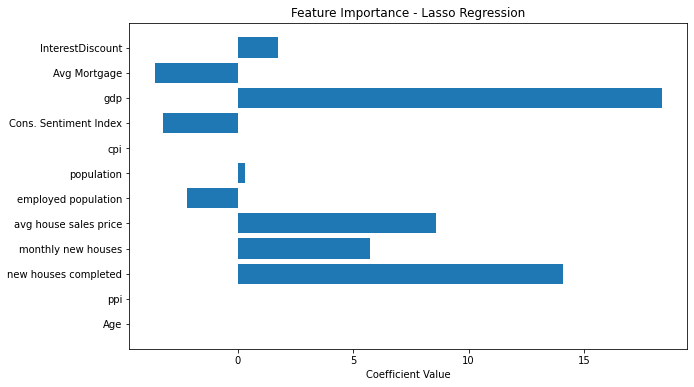

In [117]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train_df_scaled.columns, lasso_coef)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Lasso Regression')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

### Observations:
- The important features that affect HPI in positive manner are as follows(Inorder of their importance): GDP Per Capita, New houses completed in a given month, avg sales price of houses, New monthly houses introduced each month. It means higher the value of these variables, higher the House Price Index.
- The important features that affect HPI in negative manner are as follows(Inorder of their importance): Avg Mortgage rate, Consumer Sentiment Index, Employed Population i.e. higher the value of these variables lower the house price index. 

## Support Vector Regressor

In [119]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
svr_model = SVR()
params =[{'C': [0.1,1, 10, 100], 
         'kernel': ['rbf'],
         'gamma': [1,0.1,0.01,0.001]}]
random_search = RandomizedSearchCV(svr_model, param_distributions=params, 
                                   cv=4, n_jobs=-1, random_state=42)
random_search.fit(X_train_df, y_train)

RandomizedSearchCV(cv=4, estimator=SVR(), n_jobs=-1,
                   param_distributions=[{'C': [0.1, 1, 10, 100],
                                         'gamma': [1, 0.1, 0.01, 0.001],
                                         'kernel': ['rbf']}],
                   random_state=42)

In [123]:
best_params = random_search.best_params_

In [124]:
best_params

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [125]:
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_df, y_train)

SVR(C=100, gamma=0.01)

In [127]:
y_pred_test = best_svr_model.predict(X_test_df_scaled)
y_pred_train = best_svr_model.predict(X_train_df_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [128]:
print("train mse = {}\ntest mse:{}".format(mse_train, mse_test))

train mse = 666.4849496449581
test mse:10580.710956914912


In [129]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [130]:
print("train r2 score = {}\ntest r2 score:{}".format(r2_train, r2_test))

train r2 score = -2.6673936392995756e-09
test r2 score:-6.234140027816433


## RandomForest

In [131]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
params = {'bootstrap': [True, False],
 'max_depth': [3, 7, 10, 15, 20, 30, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf = RandomForestRegressor()
random_search = RandomizedSearchCV(rf, param_distributions=params, 
                                   cv=4, n_jobs=-1, random_state=42)
random_search.fit(X_train_df, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 7, 10, 15, 20, 30, 40,
                                                      60, 80, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [140]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=40, min_samples_leaf=2,
                      n_estimators=600)

In [156]:
best_params = random_search.best_params_
best_rf_model = RandomForestRegressor(bootstrap=False, max_depth=40, min_samples_leaf=2,
                      n_estimators=600)
best_rf_model.fit(X_train_df, y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, min_samples_leaf=2,
                      n_estimators=600)

In [157]:
y_pred_test = best_rf_model.predict(X_test_df_scaled)
y_pred_train = best_rf_model.predict(X_train_df_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

In [158]:
print("train mse = {}\ntest mse:{}".format(mse_train, mse_test))

train mse = 1343.7106635752702
test mse:16226.516781023556


In [159]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [160]:
print("train r2 score = {}\ntest r2 score:{}".format(r2_train, r2_test))

train r2 score = -1.0161155445074659
test r2 score:-10.094235069423373


### We see that linear regression works best for our data since we saw in EDA that most of the variablea show linear relationship with the target variable